C:\Users\B S COM\AppData\Local\Temp\ipykernel_1720\84325395.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.age.fillna(value=X['age'].mean(),inplace=True)
c:\Users\B S COM\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


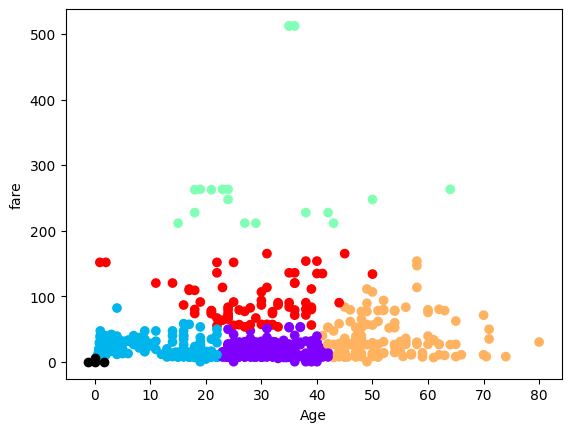

['KMeansClustering.joblib']

In [4]:
# ### K- mean Clustering
# #unsupervised ML
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# df= sns.load_dataset('titanic')
# df.head()
# #Model 
# from sklearn.cluster import KMeans
# #for normalize data
# from sklearn.preprocessing import StandardScaler
# #import data in features
# X=df[['age','fare']]
# X.age.fillna(value=X['age'].mean(),inplace=True)
# #scaled data
# scaler=StandardScaler()
# X_scaled =scaler.fit_transform(X)
# X.head()
# X_scaled
# #perform K Mean clustering
# model=KMeans(n_clusters=5)
# model.fit(X_scaled)
# #Assign cluster label to the data
# df['cluster']=model.labels_
# df.head()
# df['cluster'].unique()
# #plotting
# plt.scatter(df['age'],df['fare'],c=df['cluster'],cmap='rainbow')
# plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='black')
# plt.xlabel('Age')
# plt.ylabel('fare')
# plt.show()
# import plotly.express as px
# fig =px.scatter(df,x='age',y='fare',color= 'cluster')
# fig.show()
# # pip install nbformat
# # !pip install --upgrade nbformat

# # pip install --upgrade nbformat

# fig=px.parallel_coordinates(df,color='cluster',title='titanic clusters')
# fig.show()


#### save and resue the model

In [5]:
# How to save and reuse the model 
# pip install  joblib
#saving the model
# import joblib
# joblib.dump(model,'KMeansClustering.joblib')


['KMeansClustering.joblib']

In [6]:
# #load the saved model
# model_loaded=joblib.load('KMeansClustering.joblib')

now same work we are going to do with decision tree

In [27]:
import seaborn as sns
df_1=sns.load_dataset('tips')
df_1.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [39]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
le.fit(df_1['smoker'])
df_1['smoker']=le.transform(df_1['smoker'])


In [41]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
le.fit(df_1['day'])
df_1['day']=le.transform(df_1['day'])

In [43]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
le.fit(df_1['time'])
df_1['time']=le.transform(df_1['time'])

In [44]:
df_1

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,0,2,0,2
1,10.34,1.66,Male,0,2,0,3
2,21.01,3.50,Male,0,2,0,3
3,23.68,3.31,Male,0,2,0,2
4,24.59,3.61,Female,0,2,0,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,0,1,0,3
240,27.18,2.00,Female,1,1,0,2
241,22.67,2.00,Male,1,1,0,2
242,17.82,1.75,Male,0,1,0,2


In [45]:
X=df_1.drop(columns=['sex'])
y=df_1['sex']

In [46]:
X=pd.get_dummies(X,columns=['smoker'])

In [48]:
X.head()

,total_bill,tip,day,time,size,smoker_0,smoker_1
0,16.99,1.01,2,0,2,True,False
1,10.34,1.66,2,0,3,True,False
2,21.01,3.50,2,0,3,True,False
3,23.68,3.31,2,0,2,True,False
4,24.59,3.61,2,0,4,True,False


In [ ]:
y.head()

0    Female
1      Male
2      Male
3      Male
4    Female
Name: sex, dtype: category
Categories (2, object): ['Male', 'Female']

In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [ ]:
df_1.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [49]:
from sklearn.tree import DecisionTreeClassifier
#writing code in low code
model=DecisionTreeClassifier().fit(X,y)

In [51]:
joblib.dump(model,'TipsModel.joblib')

['TipsModel.joblib']

In [52]:
model_1= joblib.load('TipsModel.joblib')

saving model through pickle

In [55]:
import pickle
#save the model
with open('model.pkl','wb') as f:
    pickle.dump(model,f)
#load the model
with open('model.pkl','rb') as f:
    loaded_model=pickle.load(f)